In [18]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [17]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [5]:
data_dir='/content/drive/MyDrive/PlantDisease/Data'
categories=os.listdir(data_dir)

#Load images and labels
images=[]
labels=[]

for category in categories:
  print(category)
  folder_path=os.path.join(data_dir,category)
  for img_file in os.listdir(folder_path):
      img_path=os.path.join(folder_path,img_file)
      img=cv2.imread(img_path)
      if img is not None:
         img=cv2.resize(img,(64,64)) #Resize to uniform size
         images.append(img)
         labels.append(category)

#Convert images and labels to numpy arrays
images=np.array(images)



Tomato___Target_Spot
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus


In [6]:
##Convert to numpy arrays
x=np.array(images)
y=np.array(labels)

print("labels:",np.unique(y))
print("Data Shape:",x.shape)

labels: ['Tomato___Target_Spot' 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
 'Tomato___Tomato_mosaic_virus']
Data Shape: (4024, 64, 64, 3)


Class Distribution:
Tomato___Tomato_Yellow_Leaf_Curl_Virus    1961
Tomato___Tomato_mosaic_virus              1790
Tomato___Target_Spot                       273
Name: count, dtype: int64


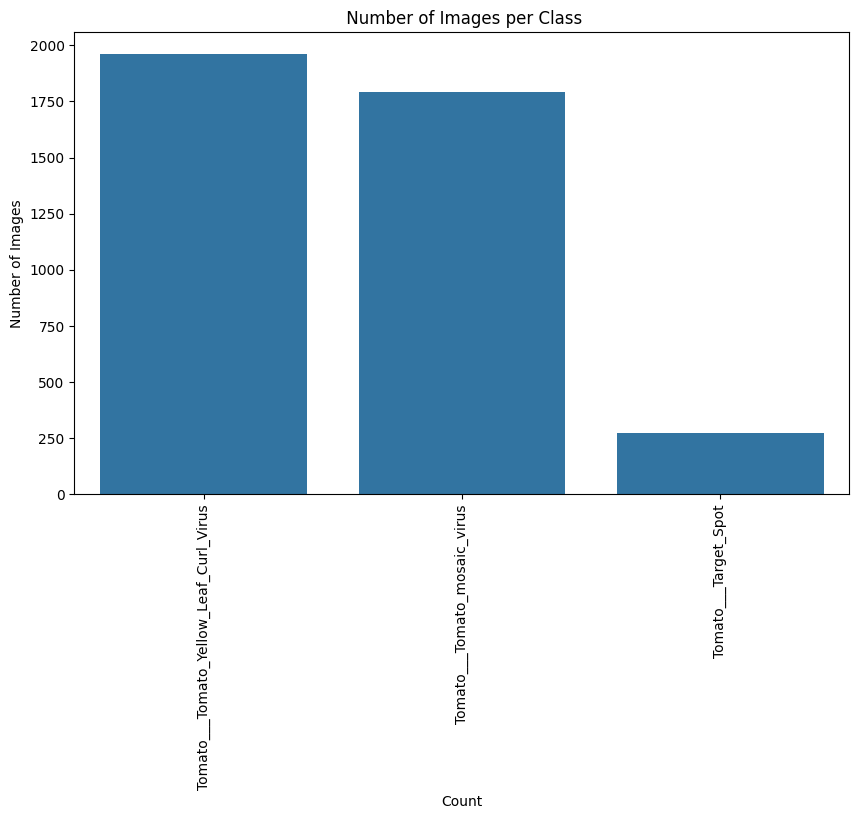

In [7]:
class_counts=pd.Series(y).value_counts()
print("Class Distribution:")
print(class_counts)

#Plot class Distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index,y=class_counts.values)
plt.xticks(rotation=90)
plt.title(" Number of Images per Class")
plt.xlabel("Count")
plt.ylabel("Number of Images")
plt.show()

In [8]:
#Remove corrupted images()
valid_images=[]
valid_labels=[]

for img,label in zip(x,y):
  if img.shape==(64,64,3):
    valid_images.append(img)
    valid_labels.append(label)

x=np.array(valid_images)
y=np.array(valid_labels)

print("Cleaned Data Shape:",x.shape)


Cleaned Data Shape: (4024, 64, 64, 3)


In [9]:
#Encode Labels
le=LabelEncoder()
y_encoded=le.fit_transform(y)

#save class names for later use
class_names=le.classes_
class_names

array(['Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Tomato_mosaic_virus'], dtype='<U38')

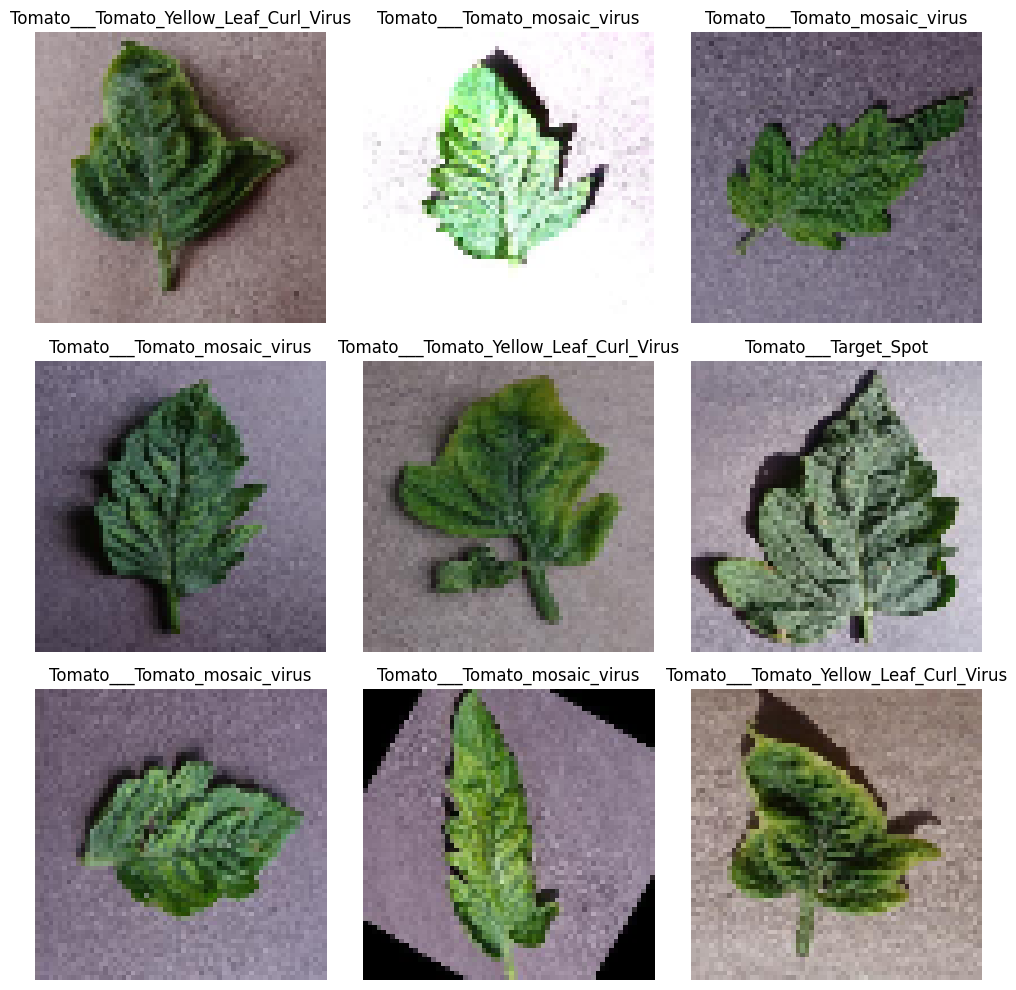

In [10]:
import random

plt.figure(figsize=(10,10))
for i in range(9):
  idx=random.randint(0,len(x))
  plt.subplot(3,3,i+1)
  plt.imshow(cv2.cvtColor(x[idx],cv2.COLOR_BGR2RGB))
  plt.title(class_names[y_encoded[idx]])
  plt.axis("off")
plt.tight_layout()
plt.show()

In [11]:
def extract_color_histogram(image,bins=(8,8,8)):

  image=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
  hist=cv2.calcHist([image],[0,1,2],None,bins,[0,256,0,256,0,256])
  hist=cv2.normalize(hist,hist).flatten()
  return hist

hist_features=[extract_color_histogram(img) for img in x]
x_features=np.array(hist_features)



In [12]:
x_features.shape

(4024, 512)

In [13]:
#Choose model
model=SVC(kernel='rbf',gamma='scale')


In [14]:
#Train/Test split
x_train,x_test,y_train,y_test=train_test_split(x_features,y_encoded,test_size=0.2,random_state=42)

#Train model
model.fit(x_train,y_train)

#Predict
y_pred=model.predict(x_test)

Accuracy: 0.9925465838509316
F1 Score: 0.9924021114631193


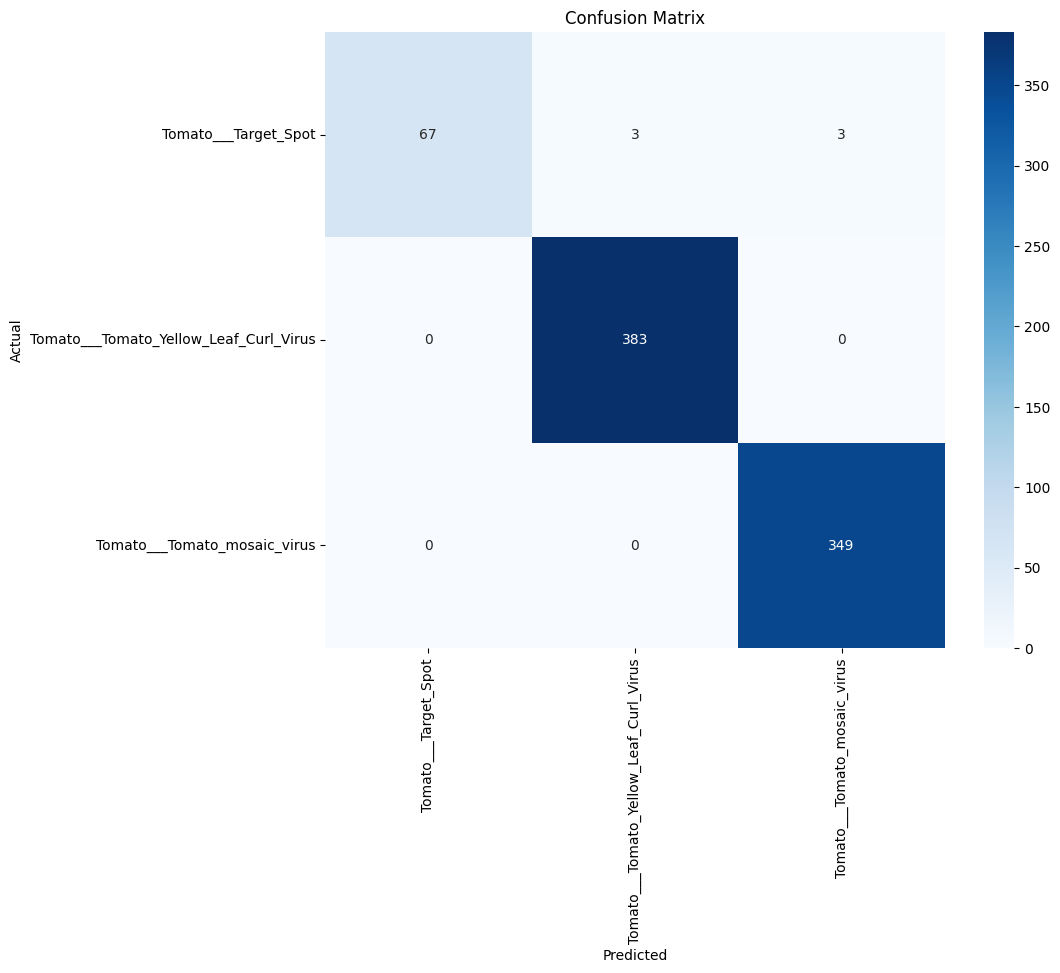

In [15]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

#Accuracy
acc=accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

#F1 Score
f1=f1_score(y_test,y_pred,average='weighted')
print("F1 Score:",f1)

#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)

#Plot Confusion Matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [16]:
#Classification Report
print("Classification Report:")
print(classification_report(y_test,y_pred,target_names=class_names))

Classification Report:
                                        precision    recall  f1-score   support

                  Tomato___Target_Spot       1.00      0.92      0.96        73
Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.99      1.00      1.00       383
          Tomato___Tomato_mosaic_virus       0.99      1.00      1.00       349

                              accuracy                           0.99       805
                             macro avg       0.99      0.97      0.98       805
                          weighted avg       0.99      0.99      0.99       805

